# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [2]:
#load neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# load the titanic dataset 
df =  pd.read_csv("titanic.csv")

Use the `.info()` method to quickly preview which features have missing data

In [3]:
# Preview the dataset to see any missing data 
df.info()
# It seems that the cabin column is missing a lot and the embarked is missing a couple points as well 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

The Mean Age is 29.7 and Median Age is 27.0. The standard deviation is for the ages are 16.1


c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of People')

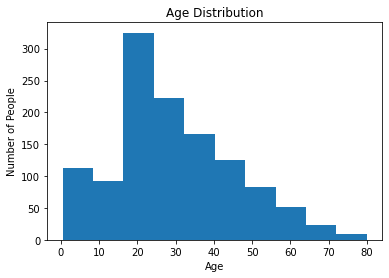

In [4]:
# Mean, median, and standard deviation of 'Age' column 
Mean_Age = df["Age"].mean().round(1)
Median_Age = df["Age"].median().round(1)
StdDev_Age = df["Age"].std().round(1)
print(f"The Mean Age is {Mean_Age} and Median Age is {Median_Age}. The standard deviation is for the ages are {StdDev_Age}")
# Make a histogram for the distribution of the age values
plt.hist(df["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

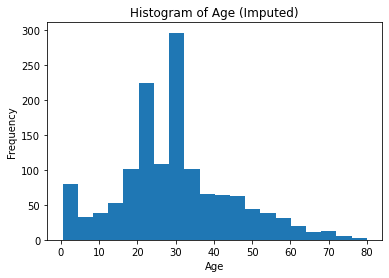

The new mean age is 29.7, the new median age is 29.7, and the new standard deviation of age is 15.0.


In [5]:
# impute missing age values with average age 

# make a copy first to save the original data frame  
df_imputed = df.copy()

# Impute missing values in the 'Age' column with the mean value
mean_age = df_imputed['Age'].mean()
df_imputed['Age'].fillna(mean_age, inplace=True)

# Calculate the new summary statistics
new_mean_age = df_imputed['Age'].mean()
new_median_age = df_imputed['Age'].median()
new_std_age = df_imputed['Age'].std()

# Plot the histogram
plt.hist(df_imputed['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Imputed)')
plt.show()

# Print the new summary statistics
print(f"The new mean age is {new_mean_age:.1f}, the new median age is {new_median_age:.1f}, and the new standard deviation of age is {new_std_age:.1f}.")

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

Text(0, 0.5, 'Frequency')

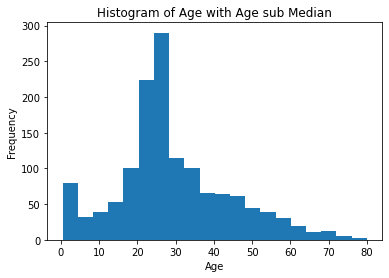

In [7]:
# Make a new copy of the original dataframe 
df_imputed_2 = df.copy()

#Compute the median and replace NaN values with mean in Age column 
median_2 = df_imputed_2['Age'].median()
df_imputed_2['Age'].fillna(median_2, inplace = True)

# Compute the standard deviation, median, and mean values of the dataframe
mean_age2 = df_imputed_2['Age'].mean()
median_age2 = df_imputed_2['Age'].median()
stddev_age2 = df_imputed_2['Age'].std()

# Plot the data as a historgram 
plt.hist(df_imputed_2['Age'], bins = 20) 
plt.title("Histogram of Age with Age sub Median") 
plt.xlabel("Age")
plt.ylabel("Frequency")

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

Text(0.5, 1.0, 'Histogram of Age (Dropped)')

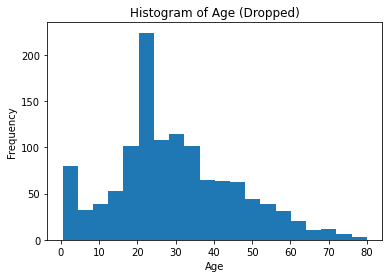

In [8]:
# drop all rows with missing NaN values 
df_dropped = df.copy()

df_dropped.dropna(subset = ["Age"], inplace = True)

# Calculate the new summary statistics
new_mean_age = df_dropped['Age'].mean()
new_median_age = df_dropped['Age'].median()
new_std_age = df_dropped['Age'].std()

# Plot the histogram
plt.hist(df_dropped['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Dropped)')


### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.